In [1]:
!pip install pyxDamerauLevenshtein

     |████████████████████████████████| 61kB 2.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyxDamerauLevenshtein: filename=pyxDamerauLevenshtein-1.5.3-cp36-cp36m-linux_x86_64.whl size=86816 sha256=5ddb089a65f46114b0719a65b506f263ed8838d3d0a28f49ffda372661852ce1
  Stored in directory: /root/.cache/pip/wheels/37/66/2c/863e33407d169ea809ce2908e86556df205dcf5edc4bdd10a5
Successfully built pyxDamerauLevenshtein


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

from pyxdameraulevenshtein import damerau_levenshtein_distance

## Loading the Data

In [0]:
spelling_errs = pd.read_pickle("/content/gdrive/My Drive/RLC/spelling_errs.pickle")

In [0]:
spelling_errs['distance'] = spelling_errs.apply(lambda x: damerau_levenshtein_distance(x["Ошибка"], x["Исправление"]), axis=1)

In [10]:
spelling_errs['distance'].describe()

count    9411.000000
mean        1.944852
std         2.391456
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        47.000000
Name: distance, dtype: float64

In [0]:
dists = spelling_errs.groupby('distance').count()["Ошибка"]

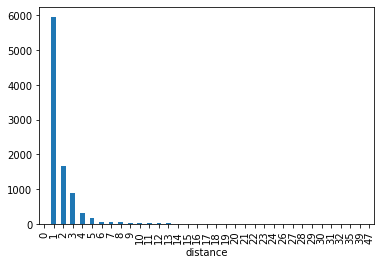

In [18]:
dists.plot(kind='bar')

In [23]:
dist_percs = dists / dists.sum()
dist_percs

distance
0     0.000638
1     0.632770
2     0.178727
3     0.095420
4     0.034534
5     0.017108
6     0.007757
7     0.006163
8     0.005207
9     0.003188
10    0.003082
11    0.002125
12    0.002125
13    0.002019
14    0.001275
15    0.001594
16    0.001488
17    0.000638
18    0.000425
19    0.000638
20    0.000531
21    0.000531
22    0.000106
23    0.000425
24    0.000106
26    0.000106
27    0.000106
28    0.000213
29    0.000106
30    0.000106
31    0.000106
32    0.000106
35    0.000213
39    0.000106
47    0.000213
Name: Ошибка, dtype: float64

In [28]:
dist_percs[5:].sum() + dist_percs[0]

0.058548507066199136

In [38]:
chosen_errs = np.array(dist_percs[1:5])
chosen_errs = chosen_errs / chosen_errs.sum(axis=0,keepdims=1)
chosen_errs = pd.DataFrame({i+1: [chosen_errs[i]] for i in range(len(chosen_errs))}).T

chosen_errs

,0
1,0.672122
2,0.189842
3,0.101354
4,0.036682


In [39]:
chosen_errs[0].sum()

0.9999999999999999